# Overview
The main point of this script which is dependent on `resynthesize.py` and `signal_processing.py` is to resynthesize a a tone with quantifiable timbral features based on the harmonic distribution of an imported sound wav. 

&copy; <i>Andrew Sivaprakasam 2021</i>

In [1]:
#Formatting (to center plots):
from IPython.display import display, HTML

CSS = """
.output {
    align-items: center;
}
"""

HTML('<style>{}</style>'.format(CSS))

# Importing Relevant Functions

In [15]:
from resynthesize import resynthesize, extract_harmonics, play_alma_mater
from signal_processing import pure_tone_complex, sound, magphase, get_spect
import matplotlib.pyplot as plt
from scipy.signal import spectrogram as sp
from scipy.io import wavfile
import numpy as np

# Generating a Simulated Tone

In [3]:
harmonics = 7;
first = 0;
dur_sec = 1;
toPlay = np.array(
    [0,1,2,3,4,5,6])

fname = 'instruments/banjo_A4_normal.wav'
fs, x  = wavfile.read(fname)

extract = extract_harmonics(fname, fs = 44100, f_0 = 440, n_harms = harmonics);

fs_Hz = extract[4];
amp = extract[1][toPlay];
phase = extract[2][toPlay];
freq_Hz = extract[0][toPlay];

t_vect = np.arange(0,dur_sec*fs_Hz)/fs_Hz;
env_banj = np.exp(-5*t_vect);
env_string = (1+0.15*np.sin(6*np.pi*2*t_vect))*np.sin(.5*np.pi*2*t_vect);
env_bassoon = (1+0.2*np.sin(5*np.pi*2*t_vect))*np.sin(.5*np.pi*2*t_vect);
env_flute = (1+0.50*np.sin(5*np.pi*2*t_vect))*np.sin(.5*np.pi*2*t_vect);

tone = resynthesize(amp, 'sound.wav', fs_Hz = 44100,freq_Hz = freq_Hz, dur_sec = 1, phi = phase, 
        scale = 1, tone_shift = 1, env_fxn = env_banj, type = 'saw', play_write = True, plot = False)

# Spectrogram of Output

/mnt/20D22780D22758F4/Shared/Code/Timbre_SfN_2021/stimulus_generation_resynthesized/signal_processing.py:268: UserWarning: shading value 'goraud' not in list of valid values ['gouraud', 'nearest', 'flat', 'auto']. Setting shading='auto'.
  plt.pcolormesh(t,f,Sgram_dB, shading = shading, cmap = colormap);


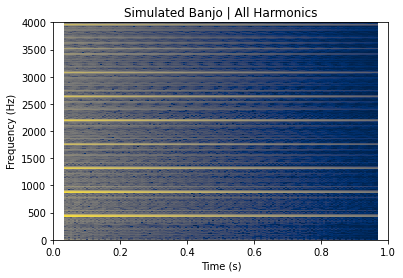

In [4]:
get_spect(tone, fs_Hz, DR = 300, BW = 60, xlim = [0,1], ylim = [0,4000], 
          colormap = 'cividis',title = 'Simulated Banjo | All Harmonics');

Text(0, 0.5, 'Scaled Amplitude')

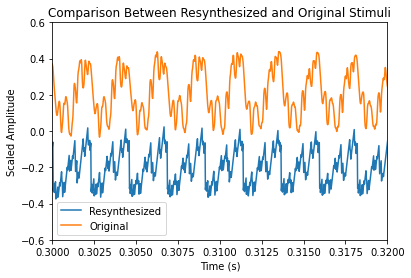

In [5]:
plt.figure()
plt.plot(t_vect, tone-0.2, label = 'Resynthesized')
plt.xlim(0.3,0.32)

#original signal for sanity check
t_vect_orig = np.arange(0,len(x))/fs
plt.plot(t_vect_orig+0.01, x/max(x)+0.2,label = 'Original')
plt.xlim(0.3,0.32)
plt.ylim(-.6,0.6)
plt.legend();
plt.title('Comparison Between Resynthesized and Original Stimuli');
plt.xlabel('Time (s)')
plt.ylabel('Scaled Amplitude')

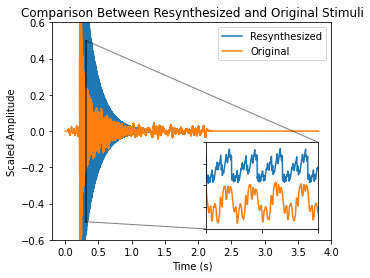

In [87]:
fig, ax = plt.subplots(figsize=[5,4]);
plt.plot(t_vect+0.25, tone, label = 'Resynthesized')

#original signal for sanity check
t_vect_orig = np.arange(0,len(x))/fs
plt.plot(t_vect_orig, x/max(x),label = 'Original')

plt.ylim(-.6,0.6)

plt.legend();
plt.title('Comparison Between Resynthesized and Original Stimuli');
plt.xlabel('Time (s)')
plt.ylabel('Scaled Amplitude')

axins = ax.inset_axes([0.55, 0.05, 0.4, 0.4])
axins.plot(t_vect, tone+0.2)
axins.plot(t_vect_orig+0.01, x/max(x)-0.2)

x1, x2, y1, y2 = 0.3, 0.31, -0.5, 0.5
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticklabels('')
axins.set_yticklabels('')

ax.indicate_inset_zoom(axins, edgecolor="black")
plt.savefig('comparison.png', facecolor="white", dpi=100, transparent=False, bbox_inches = "tight", pad_inches = 0.05);
plt.draw()
plt.show()
